In [1]:
from data_generator import *
from eda_tools import plot_graph

## Example of parsing active constraints: DC-OPF

In [2]:
org_dir = os.getcwd()
os.chdir('./matpower7.1/')

In [3]:
eng = matlab.engine.start_matlab()

In [4]:
case_name = "pglib_opf_case24_ieee_rts.m"

In [5]:
data = eng.dc_opf_solver(case_name, 0.05)
eng.quit()
os.chdir(org_dir)

In [6]:
data = standardize_data_type(data, "float32")
data

{'bus_info': {'p_d': array([[110.903404],
         [105.89434 ],
         [159.67038 ],
         [ 77.19004 ],
         [ 72.131615],
         [127.10772 ],
         [122.29005 ],
         [173.92944 ],
         [206.31097 ],
         [222.00201 ],
         [  0.      ],
         [  0.      ],
         [274.6116  ],
         [193.38837 ],
         [328.32867 ],
         [ 98.97517 ],
         [  0.      ],
         [357.80347 ],
         [193.75175 ],
         [137.07004 ],
         [  0.      ],
         [  0.      ],
         [  0.      ],
         [  0.      ]], dtype=float32),
  'bus_idx': array([[ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.],
         [12.],
         [13.],
         [14.],
         [15.],
         [16.],
         [17.],
         [18.],
         [19.],
         [20.],
         [21.],
         [22.],
         [23.],
         [24.]], dtype=float32)},

In [7]:
data["success_info"]["success"] == 1

True

### an example of feature: x

In [8]:
data["w_info"]["w"]

array([[  2.9034026,   8.894342 , -20.329622 ,   3.1900413,   1.1316166,
         -8.892281 ,  -2.7099502,   2.9294393,  31.310974 ,  27.00201  ,
          0.       ,   0.       ,   9.611606 ,  -0.6116323,  11.328675 ,
         -1.0248303,   0.       ,  24.803465 ,  12.751762 ,   9.070031 ,
          0.       ,   0.       ,   0.       ,   0.       ]],
      dtype=float32)

In [9]:
x = data["w_info"]["w"].reshape(data["w_info"]["w"].shape[1], 1)
x

array([[  2.9034026],
       [  8.894342 ],
       [-20.329622 ],
       [  3.1900413],
       [  1.1316166],
       [ -8.892281 ],
       [ -2.7099502],
       [  2.9294393],
       [ 31.310974 ],
       [ 27.00201  ],
       [  0.       ],
       [  0.       ],
       [  9.611606 ],
       [ -0.6116323],
       [ 11.328675 ],
       [ -1.0248303],
       [  0.       ],
       [ 24.803465 ],
       [ 12.751762 ],
       [  9.070031 ],
       [  0.       ],
       [  0.       ],
       [  0.       ],
       [  0.       ]], dtype=float32)

In [10]:
x.shape

(24, 1)

### an example of lable: y

In [11]:
data["gen_info"]['p_g']

array([[ 16.      ],
       [ 16.      ],
       [ 76.      ],
       [ 76.      ],
       [ 16.      ],
       [ 16.      ],
       [ 76.      ],
       [ 76.      ],
       [ 61.521976],
       [ 61.521976],
       [ 61.521976],
       [108.93104 ],
       [108.93104 ],
       [108.93104 ],
       [  0.      ],
       [  2.4     ],
       [  2.4     ],
       [  2.4     ],
       [  2.4     ],
       [  2.4     ],
       [155.      ],
       [155.      ],
       [400.      ],
       [400.      ],
       [ 50.      ],
       [ 50.      ],
       [ 50.      ],
       [ 50.      ],
       [ 50.      ],
       [ 50.      ],
       [155.      ],
       [155.      ],
       [350.      ]], dtype=float32)

In [12]:
data["gen_info"]['p_g_lim']

array([[ 20. ,  16. ],
       [ 20. ,  16. ],
       [ 76. ,  15.2],
       [ 76. ,  15.2],
       [ 20. ,  16. ],
       [ 20. ,  16. ],
       [ 76. ,  15.2],
       [ 76. ,  15.2],
       [100. ,  25. ],
       [100. ,  25. ],
       [100. ,  25. ],
       [197. ,  69. ],
       [197. ,  69. ],
       [197. ,  69. ],
       [  0. ,   0. ],
       [ 12. ,   2.4],
       [ 12. ,   2.4],
       [ 12. ,   2.4],
       [ 12. ,   2.4],
       [ 12. ,   2.4],
       [155. ,  54.3],
       [155. ,  54.3],
       [400. , 100. ],
       [400. , 100. ],
       [ 50. ,  10. ],
       [ 50. ,  10. ],
       [ 50. ,  10. ],
       [ 50. ,  10. ],
       [ 50. ,  10. ],
       [ 50. ,  10. ],
       [155. ,  54.3],
       [155. ,  54.3],
       [350. , 140. ]], dtype=float32)

In [13]:
data["gen_info"]['gen2bus']

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 7.],
       [ 7.],
       [ 7.],
       [13.],
       [13.],
       [13.],
       [14.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [15.],
       [16.],
       [18.],
       [21.],
       [22.],
       [22.],
       [22.],
       [22.],
       [22.],
       [22.],
       [23.],
       [23.],
       [23.]], dtype=float32)

In [18]:
y = get_active_gen_constraints(data)
y

array([[-1., -1., -1., -1.,  0.,  0.],
       [-1., -1., -1., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1., -1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

### a graph representaion of the power system

In [15]:
g = {
    "bus_idx": data["bus_info"]["bus_idx"].squeeze(),
    "fbus2tbus": data["flow_info"]["bus2bus"],
    "gen_bus_idx":data["gen_info"]["gen2bus"]
}

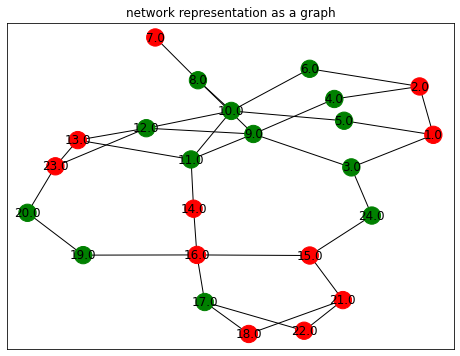

In [16]:
plot_graph(g)

## Build Datasets

### create an example dataset
- **x**: uncertainty realization as a feature input
- **y**: active constraints index as a label output
- **g**: graph information

In [19]:
case_name = "pglib_opf_case24_ieee_rts.m"

In [20]:
create_dataset(test_case=case_name,
               dataset_size=10,
               std_scaler=0.03,
               gen_only=True)

> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 10/10 [00:11<00:00,  1.17s/it]


### check the example dataset

In [21]:
dataset = load_dataset(case_name,
                       dataset_size=10,
                       std_scaler=0.03,
                       gen_only=True)

In [22]:
dataset['x'].shape, dataset['y'].shape # (num_samples, num_buses) 

((10, 24, 1), (10, 24, 6))

In [23]:
dataset['x']

array([[[  1.7420416 ],
        [  5.3366055 ],
        [-12.197773  ],
        [  1.9140248 ],
        [  0.67897   ],
        [ -5.335368  ],
        [ -1.6259701 ],
        [  1.7576635 ],
        [ 18.786585  ],
        [ 16.201206  ],
        [  0.        ],
        [  0.        ],
        [  5.7669635 ],
        [ -0.36697936],
        [  6.797205  ],
        [ -0.61489815],
        [  0.        ],
        [ 14.882079  ],
        [  7.6510572 ],
        [  5.442019  ],
        [  0.        ],
        [  0.        ],
        [  0.        ],
        [  0.        ]],

       [[  1.5840158 ],
        [  3.0109568 ],
        [  3.9251797 ],
        [ -0.6736389 ],
        [  0.6259462 ],
        [ -3.2121139 ],
        [  3.3314836 ],
        [ -5.8844695 ],
        [ -5.61157   ],
        [ -4.7355676 ],
        [  0.        ],
        [  0.        ],
        [  2.5852647 ],
        [ -4.393683  ],
        [ 13.031539  ],
        [ -5.134549  ],
        [  0.        ],
        [ -2.4

In [24]:
dataset['y']

array([[[2., 2., 2., 2., 0., 0.],
        [2., 2., 2., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[2., 2., 2., 2., 0., 0.],
        [2., 2., 2., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[2., 2., 2., 2., 0., 0.],
        [2., 2., 2., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       ...,

       [[2., 2., 2., 2., 0., 0.],
        [2., 2., 2., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[2., 2., 2., 2., 0., 0.],
        [2., 2., 2., 2., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        .

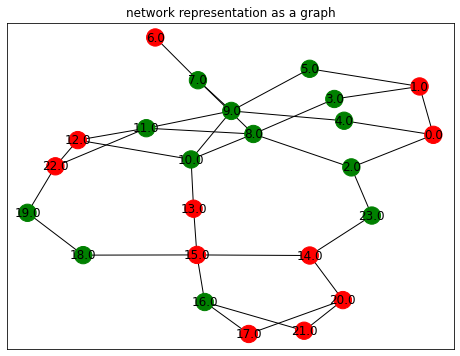

In [25]:
plot_graph(dataset['g'])

### generate sample datasets for EDA

- test_type
    - default: base case benchmarks as originally specified
    - api: heavily loaded test cases (i.e. binding thermal limit constraints)
    - sad: small phase angle difference cases (i.e. binding phase angle difference constraints)

In [24]:
test_cases = [
    "pglib_opf_case24_ieee_rts.m",
    "pglib_opf_case30_ieee.m",
    "pglib_opf_case39_epri.m",
    "pglib_opf_case57_ieee.m",
    "pglib_opf_case73_ieee_rts.m",
    "pglib_opf_case89_pegase.m",
    "pglib_opf_case118_ieee.m",
    "pglib_opf_case162_ieee_dtc.m",
    "pglib_opf_case179_goc.m",
    "pglib_opf_case200_activ.m",
    "pglib_opf_case240_pserc.m",
    "pglib_opf_case300_ieee.m",
    "pglib_opf_case500_goc.m",
    "pglib_opf_case588_sdet.m",
    "pglib_opf_case793_goc.m",
    "pglib_opf_case1354_pegase.m",
    "pglib_opf_case1888_rte.m",
    "pglib_opf_case1951_rte.m",
    "pglib_opf_case2000_goc.m",
    "pglib_opf_case2312_goc.m",
    "pglib_opf_case2383wp_k.m",
#     "pglib_opf_case2736sp_k.m",
#     "pglib_opf_case2737sop_k.m",
#     "pglib_opf_case2742_goc.m",
#     "pglib_opf_case2746wop_k.m",
#     "pglib_opf_case2746wop_k.m",
#     "pglib_opf_case2848_rte.m",
]

dataset_size = 100
std_scalers = [0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15]
test_types = ['default', 'api', 'sad']

In [25]:
# for std_scaler in std_scalers:
#     print("[ {} / {} ]".format(std_scaler, test_types[0]))
#     build_datasets(test_cases,
#                    dataset_size,
#                    std_scaler=std_scaler,
#                    test_type=test_types[0],
#                    gen_only=True)

In [26]:
# for test_type in test_types:
#     print("[ {} / {} ]".format(std_scalers[0], test_type))
#     build_datasets(test_cases,
#                    dataset_size,
#                    std_scaler=std_scalers[0],
#                    test_type=test_type)

### do EDA
- [EDA ipynb](https://github.com/jhyun0919/Project_EE394V_SPR2021/blob/main/data/eda.ipynb)

In [27]:
# select proper test params @ ./../params.py

### gernerate datasets based on EDA 

In [26]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../../')
from params import *

test_cases, dataset_size, std_scaler, test_type = get_test_params()

In [27]:
build_datasets(test_cases=test_cases,
               dataset_size=dataset_size,
               std_scaler=std_scaler,
               test_type=test_type,
               gen_only=True)

> creating dataset with pglib_opf_case24_ieee_rts.m


100%|██████████| 10000/10000 [06:04<00:00, 27.41it/s]
